In [48]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve
import warnings
import datetime
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import metrics

In [56]:
df = pd.read_csv("covid_data.csv")

In [57]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df = df.sort_values(by='date')
df = df.reset_index()
#df['index'] = df.reset_index().index
df = df.rename(columns={"index": "old_index"})

In [58]:
df

,old_index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,month,day
0,7990,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,...,76.67,0.845,45510324.0,NaN,NaN,NaN,NaN,2020,1,1
1,136265,MEX,North America,Mexico,2020-01-01,NaN,NaN,NaN,NaN,NaN,...,75.05,0.779,127504120.0,NaN,NaN,NaN,NaN,2020,1,1
2,136266,MEX,North America,Mexico,2020-01-02,NaN,NaN,NaN,NaN,NaN,...,75.05,0.779,127504120.0,NaN,NaN,NaN,NaN,2020,1,2
3,7991,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,...,76.67,0.845,45510324.0,NaN,NaN,NaN,NaN,2020,1,2
4,7992,ARG,South America,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,...,76.67,0.845,45510324.0,NaN,NaN,NaN,NaN,2020,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238229,81604,GHA,Africa,Ghana,2022-11-27,171009.0,0.0,1.857,1461.0,0.0,...,64.07,0.611,33475870.0,NaN,NaN,NaN,NaN,2022,11,27
238230,80615,DEU,Europe,Germany,2022-11-27,36373165.0,1.0,23965.714,157495.0,NaN,...,81.33,0.947,83369840.0,NaN,NaN,NaN,NaN,2022,11,27
238231,79579,GEO,Asia,Georgia,2022-11-27,1805698.0,NaN,NaN,16912.0,0.0,...,73.77,0.812,3744385.0,NaN,NaN,NaN,NaN,2022,11,27
238232,85577,GRD,North America,Grenada,2022-11-27,19616.0,0.0,0.000,237.0,0.0,...,72.40,0.779,125459.0,NaN,NaN,NaN,NaN,2022,11,27


In [69]:
continuous_date_without_year = df['date'][0].timetuple().tm_yday

print(df['date'][0])
print(continuous_date_without_year)


cont_data = []
for i in range(len(df['date'])):
    continuous_date_without_year = df['date'][i].timetuple().tm_yday
    if df['year'][i]-2020 > 0:
        continuous_date_without_year += 365*(df['year'][i]-2020)
    cont_data.append(continuous_date_without_year)


2020-01-01 00:00:00
1


In [70]:
df['cont_date'] = cont_data

In [77]:
df

,old_index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,month,day,cont_date
0,7990,ARG,South America,Argentina,2020-01-01,0.0,0.0,0.000,0.0,0.0,...,0.845,45510324.0,0.0,0.0,0.0,0.0,2020,1,1,1
1,136265,MEX,North America,Mexico,2020-01-01,0.0,0.0,0.000,0.0,0.0,...,0.779,127504120.0,0.0,0.0,0.0,0.0,2020,1,1,1
2,136266,MEX,North America,Mexico,2020-01-02,0.0,0.0,0.000,0.0,0.0,...,0.779,127504120.0,0.0,0.0,0.0,0.0,2020,1,2,2
3,7991,ARG,South America,Argentina,2020-01-02,0.0,0.0,0.000,0.0,0.0,...,0.845,45510324.0,0.0,0.0,0.0,0.0,2020,1,2,2
4,7992,ARG,South America,Argentina,2020-01-03,0.0,0.0,0.000,0.0,0.0,...,0.845,45510324.0,0.0,0.0,0.0,0.0,2020,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238084,41999,TCD,Africa,Chad,2022-11-27,7641.0,0.0,0.571,194.0,0.0,...,0.398,17723312.0,0.0,0.0,0.0,0.0,2022,11,27,1061
238085,41015,CAF,Africa,Central African Republic,2022-11-27,15311.0,0.0,3.143,113.0,0.0,...,0.397,5579148.0,0.0,0.0,0.0,0.0,2022,11,27,1061
238086,227754,URY,South America,Uruguay,2022-11-27,992887.0,0.0,0.000,7530.0,0.0,...,0.817,3422796.0,0.0,0.0,0.0,0.0,2022,11,27,1061
238074,170431,PHL,Asia,Philippines,2022-11-27,4033682.0,1356.0,1109.286,64594.0,23.0,...,0.718,115559008.0,0.0,0.0,0.0,0.0,2022,11,27,1061


In [72]:
df.fillna(0, inplace=True)

#df

In [81]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
corr_matrix = df.corr().abs()
#plot the heatmap
#sns.heatmap(corr_matrix, annot=True, linewidths=.5)
corr_matrix

corr_matrix = corr_matrix[corr_matrix > 0.5]
corr_matrix = corr_matrix[corr_matrix.index.to_list()]
corr_matrix



,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
total_cases,1.000000,0.671675,0.694857,0.936711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.832231,0.831945,0.834292,0.842511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.615507,NaN,NaN,NaN,NaN
new_cases,0.671675,1.000000,0.972753,0.706417,0.646532,0.633490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.558169,0.575254,0.563799,NaN,0.505043,0.506626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.543944,NaN,NaN,NaN,NaN
new_cases_smoothed,0.694857,0.972753,1.000000,0.726616,0.640903,0.653186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.574808,0.591601,0.580264,NaN,0.502908,0.515329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.557168,NaN,NaN,NaN,NaN
total_deaths,0.936711,0.706417,0.726616,1.000000,0.607181,0.626021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833605,0.853855,0.836693,0.754619,0.623179,0.635393,NaN,NaN,NaN,NaN,NaN,0.536540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.713426,NaN,NaN,NaN,NaN
new_deaths,NaN,0.646532,0.640903,0.607181,1.000000,0.976750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.594146,0.585540,NaN,NaN,NaN,NaN,NaN,0.571219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.686620,NaN,NaN,NaN,NaN
new_deaths_smoothed,NaN,0.633490,0.653186,0.626021,0.976750,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.599691,0.604042,NaN,NaN,NaN,NaN,NaN,0.588348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.702108,NaN,NaN,NaN,NaN
total_cases_per_million,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.612696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases_per_million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,0.60093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases_smoothed_per_million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.60093,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [88]:
#X = df[["cont_date","new_people_vaccinated_smoothed", "icu_patients", "weekly_icu_admissions","total_vaccinations","new_cases_smoothed"]]
Single_place = df[df['location'] == 'Japan']
X = Single_place[["cont_date"]]
Y = Single_place[["total_vaccinations"]]


Text(0, 0.5, 'total_vaccinations')

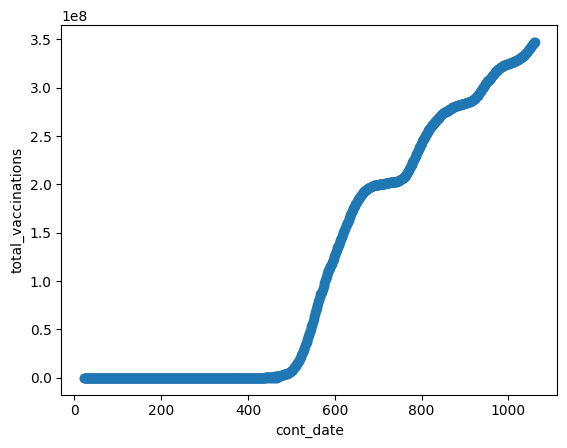

In [89]:
plt.scatter(X,Y)
plt.xlabel("cont_date")
plt.ylabel("total_vaccinations")


Text(0, 0.5, 'new_deaths_smoothed')

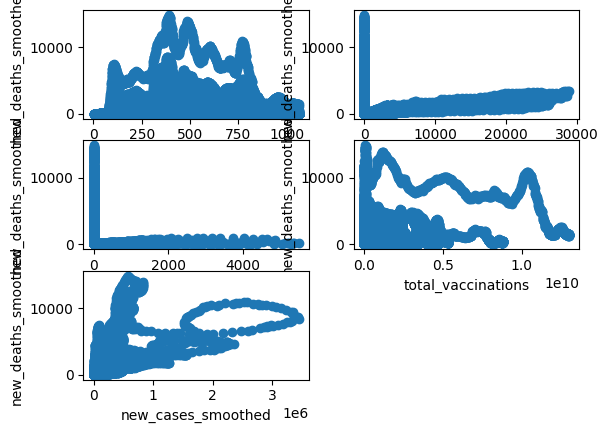

In [74]:
# Create two subplots
plt.subplot(3,2, 1)
plt.scatter(X["cont_date"],Y)
plt.xlabel("cont_date")
plt.ylabel("new_deaths_smoothed")


plt.subplot(3, 2, 2)
plt.scatter(X["icu_patients"],Y)
plt.xlabel("icu_patients")
plt.ylabel("new_deaths_smoothed")

plt.subplot(3, 2, 3)
plt.scatter(X["weekly_icu_admissions"],Y)
plt.xlabel("weekly_icu_admissions")
plt.ylabel("new_deaths_smoothed")

plt.subplot(3, 2, 4)
plt.scatter(X["total_vaccinations"],Y)
plt.xlabel("total_vaccinations")
plt.ylabel("new_deaths_smoothed")

plt.subplot(3, 2, 5)
plt.scatter(X["new_cases_smoothed"],Y)
plt.xlabel("new_cases_smoothed")
plt.ylabel("new_deaths_smoothed")


In [85]:
from sklearn.model_selection import train_test_split 

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [100]:
len(X_train)

166763

In [91]:
from sklearn import preprocessing
x_scaler = preprocessing.StandardScaler().fit(X_train)
X_train = x_scaler.transform(X_train)

y_scaler = preprocessing.StandardScaler().fit(y_train)
y_train = y_scaler.transform(y_train)

In [92]:
X_train

array([[-0.11145149, -0.11517941, -0.10341131, -0.12901568, -0.143376  ],
       [ 0.46764507, -0.11517941, -0.10341131, 13.1244853 ,  2.01456538],
       [-0.11794342, -0.11517941, -0.10341131, -0.12901568, -0.14369761],
       ...,
       [-0.11645026, -0.11517941, -0.10341131, -0.12901568, -0.14369761],
       [-0.11794342, -0.11517941, -0.10341131, -0.12901568, -0.14330452],
       [-0.11794342, -0.11517941, -0.10341131, -0.12901568, -0.14358862]])

In [101]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [94]:
print (f"Model coeficients for features {X.columns} are {model.coef_}")

Model coeficients for features Index(['new_people_vaccinated_smoothed', 'icu_patients',
       'weekly_icu_admissions', 'total_vaccinations', 'new_cases_smoothed'],
      dtype='object') are [[ 0.43150944  0.05628279 -0.02150204 -0.16788434  0.57556887]]


Text(0, 0.5, 'new_deaths_smoothed')

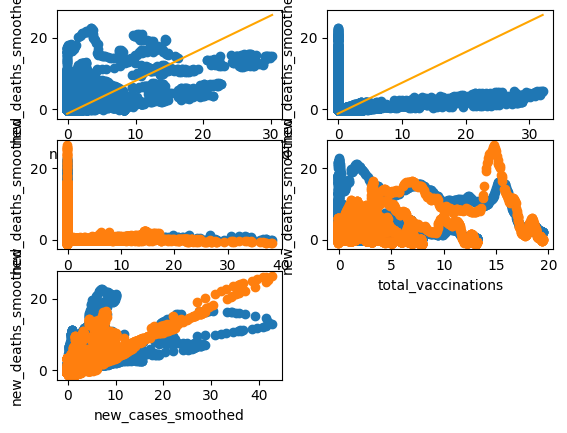

In [102]:
y_pred = model.predict(X_train)

plt.subplot(3, 2, 1)
plt.scatter(X_train[:, 0], y_train)
plt.plot([min(X_train[:, 0]), max(X_train[:, 0])], [min(y_pred), max(y_pred)], color="orange")
plt.xlabel("new_people_vaccinated_smoothed")
plt.ylabel("new_deaths_smoothed")

plt.subplot(3, 2, 2)
plt.scatter(X_train[:, 1], y_train)
plt.plot([min(X_train[:, 1]), max(X_train[:, 1])], [min(y_pred), max(y_pred)], color="orange")
plt.xlabel("icu_patients")
plt.ylabel("new_deaths_smoothed")


plt.subplot(3, 2, 3)
plt.scatter(X_train[:, 2], y_train)
plt.scatter(X_train[:, 2],y_pred)
plt.xlabel("weekly_icu_admissions")
plt.ylabel("new_deaths_smoothed")

plt.subplot(3, 2, 4)
plt.scatter(X_train[:, 3], y_train)
plt.scatter(X_train[:, 3],y_pred)
plt.xlabel("total_vaccinations")
plt.ylabel("new_deaths_smoothed")

plt.subplot(3, 2, 5)
plt.scatter(X_train[:, 4], y_train)
plt.scatter(X_train[:, 4],y_pred)
plt.xlabel("new_cases_smoothed")
plt.ylabel("new_deaths_smoothed")


In [103]:
len(y_pred)

166763

In [78]:
MSE = metrics.mean_squared_error(y_train, y_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([MSE, RMSE], index=['MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MSE,0.650503
RMSE,0.806537


In [104]:
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)
y_pred= model.predict(X_test)

In [105]:
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([MSE, RMSE], index=['MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MSE,0.436808
RMSE,0.660914


In [106]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.5925665105524529

In [107]:
y_pred

array([[-0.11595959],
       [-0.11603844],
       [-0.11588883],
       ...,
       [-0.11863563],
       [-0.10192639],
       [-0.11596505]])

In [108]:
y_pred = y_scaler.inverse_transform(y_pred)
y_pred

array([[40.27381014],
       [40.2229448 ],
       [40.31946147],
       ...,
       [38.54745173],
       [49.32687645],
       [40.27029047]])